## import and spliting dataset

In [1]:
# sanction

from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test, y_test)= mnist.load_data()

# after downloading, check this path: C:\Users\<USERNAME>\.keras\datasets\mnist.npz

In [7]:
# if you can not break the sanction, use this cell

# import numpy as np
# with np.load('mnist.npz') as data:  # download mnist.npz
#     print(list(data.keys()))

In [9]:
# with np.load('mnist.npz') as data:
#     x_train = data['x_train']
#     y_train = data['y_train']
#     x_test = data['x_test']
#     y_test = data['y_test']

In [3]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0].shape

(28, 28)

In [17]:
import numpy as np
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [19]:
x_train.shape

(60000, 28, 28, 1)

In [21]:
x_train[0].shape

(28, 28, 1)

## scaling

In [23]:
x_train = x_train / 255
x_test = x_test / 255

## modeling and evaluation

In [26]:
k = len(set(y_test))
k

10

## Sequential

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, ZeroPadding2D, Conv2D, MaxPool2D, Flatten

In [32]:
model = Sequential([
    Input(shape=x_train[0].shape),
    ZeroPadding2D((1, 1)),
    Conv2D(32, (3, 3), strides=1, activation='relu'),   # padding='same'
    MaxPool2D(pool_size=(2, 2)),
    ZeroPadding2D((1, 1)),
    Conv2D(64, (3, 3), strides=1, activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    ZeroPadding2D((1, 1)),
    Conv2D(128, (3, 3), strides=1, activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(k, activation='softmax')
])

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)       │ (None, 30, 30, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_1 (ZeroPadding2D)     │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_2 (ZeroPadding2D)     │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 688,138 (2.63 MB)

 Trainable params: 688,138 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# another type of loss: 'categorical_crossentropy' (2 noron in last layer), 'binary_crossentropy' (1 noron in last layer)

In [40]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 263s 138ms/step - accuracy: 0.9097 - loss: 0.2760 - val_accuracy: 0.9858 - val_loss: 0.0405
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 254s 135ms/step - accuracy: 0.9889 - loss: 0.0366 - val_accuracy: 0.9897 - val_loss: 0.0333


## visualizing

In [41]:
import matplotlib.pyplot as plt

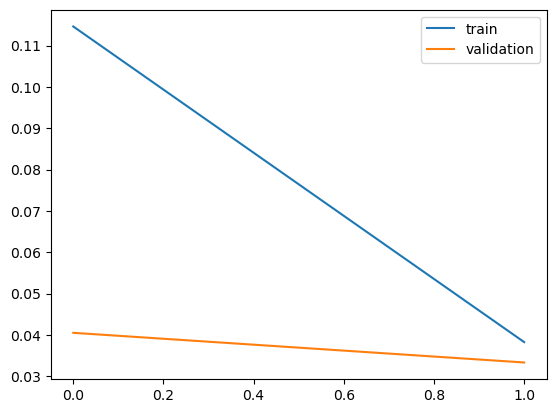

In [42]:
plt.plot(r.history['loss'], label = 'train')
plt.plot(r.history['val_loss'], label= 'validation')
plt.legend()

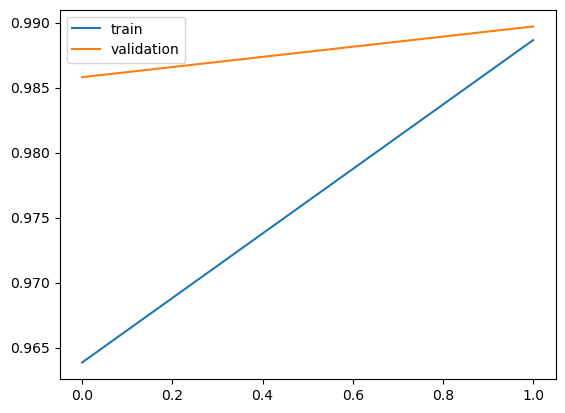

In [43]:
plt.plot(r.history['accuracy'], label = 'train')
plt.plot(r.history['val_accuracy'], label = 'validation')
plt.legend()

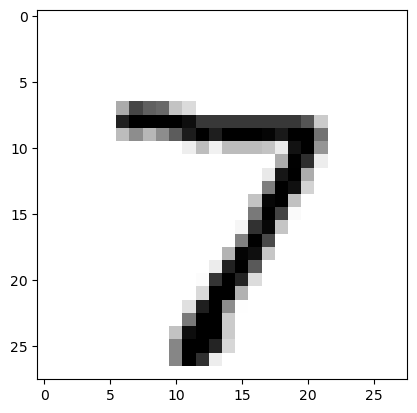

In [44]:
plt.imshow(x_test[0], cmap = 'gray_r')

In [45]:
yhat_test = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step


In [46]:
yhat_test.shape

(10000, 10)

In [47]:
yhat_test[0]

array([4.08140292e-11, 1.44605536e-07, 2.98037548e-07, 1.63618452e-07,
       6.74510048e-09, 1.14292666e-10, 2.53160720e-15, 9.99998450e-01,
       3.12059767e-10, 9.65157369e-07], dtype=float32)

In [48]:
print(y_test[0])
print(yhat_test[0].argmax())

7
7
